In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [184]:
prices = pd.read_csv('../data/StockIndexData.csv')

In [185]:
prices.describe()

,DJIA,GSPC,NDX,GDAXI,FCHI,SSEC,SENSEX
count,4534.000000,4534.000000,3471.000000,4474.000000,4484.000000,4217.000000,4332.000000
mean,12024.264544,1363.931028,2393.562377,6460.746432,4290.652378,2288.401780,13039.874506
std,2825.883696,343.223358,1081.934752,2121.576725,895.602721,925.240429,8108.154718
min,6547.049805,676.530029,938.520000,2202.959961,2403.040039,1011.499023,2600.120000
25%,10215.434815,1133.007507,1568.910000,4934.442627,3649.460022,1571.901001,4756.892500
50%,11018.915039,1295.510010,1943.940000,6172.429931,4219.814941,2103.670898,13668.405000
75%,13270.152344,1477.597503,2954.120000,7583.172363,4836.300049,2850.311035,18837.347500
max,18636.050781,2190.149902,4909.970000,12374.730469,6856.759766,6092.057129,29681.770000


In [186]:
prices[1055:1065]

,Date,DJIA,GSPC,NDX,GDAXI,FCHI,SSEC,SENSEX
1055,2003-01-10,8784.889648,927.570007,NaN,3037.330078,3160.129883,1384.859009,3358.99
1056,2003-01-13,8785.980469,926.260010,NaN,3060.649902,3169.820068,1386.313965,3327.16
1057,2003-01-14,8842.620117,931.659973,NaN,3098.719971,3174.030029,1466.850952,3335.35
1058,2003-01-15,8723.179688,918.219971,NaN,3049.399902,3134.659912,1459.920044,3357.69
1059,2003-01-16,8697.870117,914.599976,NaN,3054.110107,3142.590088,1485.618042,3373.52
1060,2003-01-17,8586.740234,901.780029,NaN,2918.820068,3056.929932,1478.675049,3370.39
1061,2003-01-21,8442.900391,887.619995,1008.93,2870.570068,2992.389893,1454.890991,3354.14
1062,2003-01-22,8318.730469,878.359985,1027.08,2803.250000,2931.379883,1460.530029,3357.04
1063,2003-01-23,8369.469727,887.340027,1039.16,2811.219971,2917.969971,1450.615967,3328.18
1064,2003-01-24,8131.009766,861.400024,992.85,2717.820068,2898.600098,1479.069946,3287.86


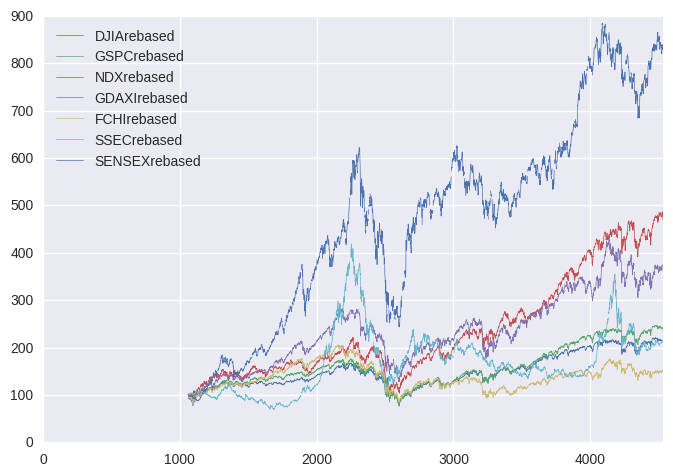

In [254]:
prices['DJIArebased'] = prices['DJIA'][1061:]/prices['DJIA'][1061] *100
prices['GSPCrebased'] = prices['GSPC'][1061:]/prices['GSPC'][1061] *100
prices['NDXrebased'] = prices['NDX'][1061:]/prices['NDX'][1061] *100
prices['GDAXIrebased'] = prices['GDAXI'][1061:]/prices['GDAXI'][1061] *100
prices['FCHIrebased'] = prices['FCHI'][1061:]/prices['FCHI'][1061] *100
prices['SSECrebased'] = prices['SSEC'][1061:]/prices['SSEC'][1061] *100
prices['SENSEXrebased'] = prices['SENSEX'][1061:]/prices['SENSEX'][1061] *100

prices['DJIArebased'].plot(linewidth=.5)
prices['GSPCrebased'].plot(linewidth=.5)
prices['NDXrebased'].plot(linewidth=.5)
prices['GDAXIrebased'].plot(linewidth=.5)
prices['FCHIrebased'].plot(linewidth=.5)
prices['SSECrebased'].plot(linewidth=.5)
prices['SENSEXrebased'].plot(linewidth=.5)
plt.legend( loc='upper left', numpoints = 1 )

In [255]:
prices['DJIALogRtn'] = (np.log(prices['DJIA'])[1:] - np.log(prices['DJIA'].shift(1))[1:])*100

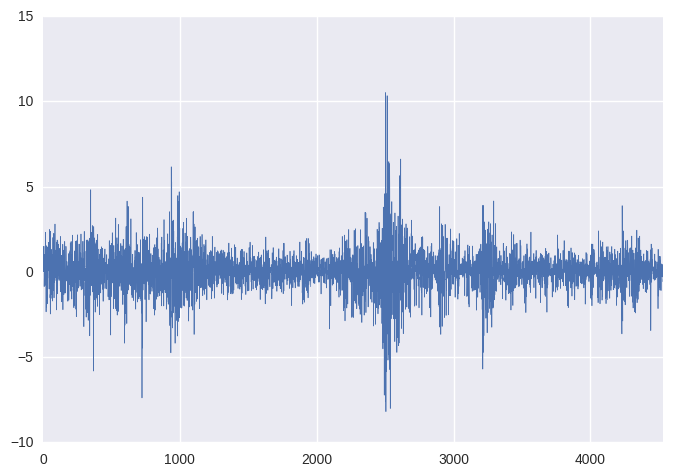

In [257]:
prices['DJIALogRtn'][1:].plot(linewidth=.5)

In [258]:
prices['GSPCLogRtn'] = (np.log(prices['GSPC'])[1:] - np.log(prices['GSPC'].shift(1))[1:])*100

In [259]:
prices['NDXLogRtn'] = (np.log(prices['NDX'])[1:] - np.log(prices['NDX'].shift(1))[1:])*100

In [260]:
prices['GDAXILogRtn'] = (np.log(prices['GDAXI'])[1:] - np.log(prices['GDAXI'].shift(1))[1:])*100

In [261]:
prices['FCHILogRtn'] = (np.log(prices['FCHI'])[1:] - np.log(prices['FCHI'].shift(1))[1:])*100

In [262]:
prices['SSECLogRtn'] = (np.log(prices['SSEC'])[1:] - np.log(prices['SSEC'].shift(1))[1:])*100

In [263]:
prices['SENSEXLogRtn'] = (np.log(prices['SENSEX'])[1:] - np.log(prices['SENSEX'].shift(1))[1:])*100

In [264]:
prices['ptfLogRtn'] = (prices['DJIALogRtn'] + prices['GSPCLogRtn'] + prices['NDXLogRtn'] + prices['GDAXILogRtn'] + prices['FCHILogRtn'] + prices['SSECLogRtn'] + prices['SENSEXLogRtn'])/7.  

In [265]:
prices1 =prices[prices['ptfLogRtn'].notnull()]
prices1 = prices1.reindex()

In [266]:
prices1.head()

,Date,DJIA,GSPC,NDX,GDAXI,FCHI,SSEC,SENSEX,DJIALogRtn,GSPCLogRtn,...,SSECLogRtn,SENSEXLogRtn,ptfLogRtn,DJIArebased,GSPCrebased,NDXrebased,GDAXIrebased,FCHIrebased,SSECrebased,SENSEXrebased
1062,2003-01-22,8318.730469,878.359985,1027.08,2803.250000,2931.379883,1460.530029,3357.04,-1.481624,-1.048720,...,0.386843,0.086423,-0.672452,98.529298,98.956760,101.798936,97.654819,97.961161,100.387592,100.086460
1063,2003-01-23,8369.469727,887.340027,1039.16,2811.219971,2917.969971,1450.615967,3328.18,0.608087,1.017174,...,-0.681113,-0.863403,0.153633,99.130267,99.968459,102.996244,97.932463,97.513027,99.706162,99.226031
1064,2003-01-24,8131.009766,861.400024,992.85,2717.820068,2898.600098,1479.069946,3287.86,-2.890541,-2.966925,...,1.942520,-1.218871,-1.962503,96.305883,97.046036,98.406232,94.678757,96.865723,101.661908,98.023935
1065,2003-01-27,7989.560059,847.479980,982.02,2643.800049,2795.780029,1496.156982,3247.71,-1.754942,-1.629178,...,1.148633,-1.228676,-1.561987,94.630514,95.477793,97.332818,92.100175,93.429671,102.836363,96.826906
1066,2003-01-28,8088.839844,858.539978,1006.51,2671.360107,2800.070068,1500.639038,3267.84,1.234962,1.296603,...,0.299123,0.617908,1.014603,95.806411,96.723821,99.760142,93.060265,93.573036,103.144431,97.427060


In [267]:
prices1.describe()

,DJIA,GSPC,NDX,GDAXI,FCHI,SSEC,SENSEX,DJIALogRtn,GSPCLogRtn,NDXLogRtn,...,SSECLogRtn,SENSEXLogRtn,ptfLogRtn,DJIArebased,GSPCrebased,NDXrebased,GDAXIrebased,FCHIrebased,SSECrebased,SENSEXrebased
count,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,...,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000
mean,12603.069435,1403.635795,2383.911065,6753.738939,4135.112452,2479.540157,15853.501850,0.011853,0.011745,0.030052,...,0.017706,0.054778,0.021414,149.274169,158.134765,236.281116,235.275182,138.187623,170.427900,472.654745
std,2930.911400,367.350458,1075.191660,2249.798344,780.336937,982.750446,7178.598433,1.102483,1.189097,1.391938,...,1.705130,1.501210,0.984845,34.714509,41.386005,106.567518,78.374619,26.077382,67.548047,214.022027
min,6547.049805,676.530029,956.570000,2329.040039,2513.610107,1011.499023,2924.030000,-8.200514,-9.469512,-9.233715,...,-12.763630,-12.795984,-6.837210,77.545032,76.218431,94.810344,81.135105,84.000087,69.524042,87.176743
25%,10444.197265,1139.787536,1568.885000,4998.812622,3568.029907,1679.142731,9967.055000,-0.443297,-0.467969,-0.625321,...,-0.740634,-0.642555,-0.420076,123.703902,128.409403,155.499886,174.140066,119.236799,115.413646,297.156797
50%,12050.205078,1307.500000,1935.315000,6484.409912,4029.660035,2336.428101,16782.650000,0.046090,0.069470,0.090918,...,0.055324,0.090751,0.069397,142.725894,147.304027,191.818560,225.892759,134.663603,160.591282,500.356276
75%,14801.530273,1591.535034,2875.080000,8046.952392,4604.542603,2990.901978,19940.540000,0.524914,0.547294,0.747184,...,0.844907,0.814426,0.524386,175.313335,179.303648,284.963278,280.325935,153.875089,205.575675,594.505298
max,18613.519531,2187.020020,4909.970000,12374.730469,6168.149902,6092.057129,29681.770000,10.508346,10.957197,11.849331,...,9.034459,15.989984,9.349853,220.463569,246.391477,486.651205,431.089650,206.127882,418.729456,884.929371


In [268]:
np.mean(prices1['ptfLogRtn'])

0.021414003747460223

In [269]:
np.std(prices1['ptfLogRtn'])

0.98467216061654073

In [270]:
a = np.array(prices1['ptfLogRtn'])

In [271]:
a

array([-0.67245159,  0.15363293, -1.96250344, ..., -0.10798553,
       -0.14728377, -0.93715887])

In [272]:
ptf_index = []

ptf_index.append(100.)

for i in xrange(len(prices1)):
    tmp = ptf_index[i] * (1.+a[i]/100)
    ptf_index.append(tmp)

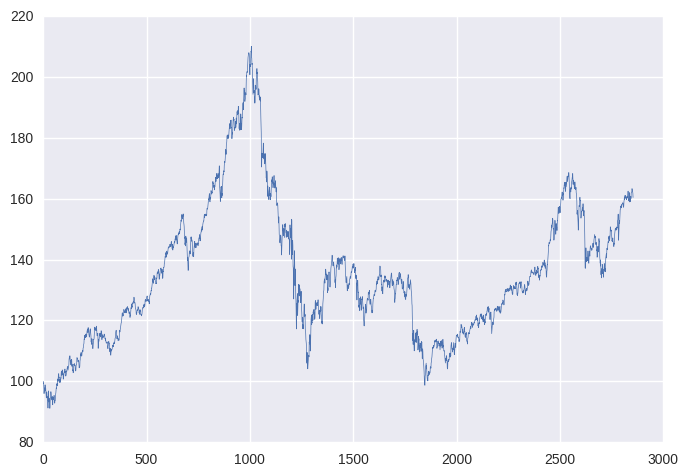

In [273]:
plt.plot(ptf_index,linewidth=.5)

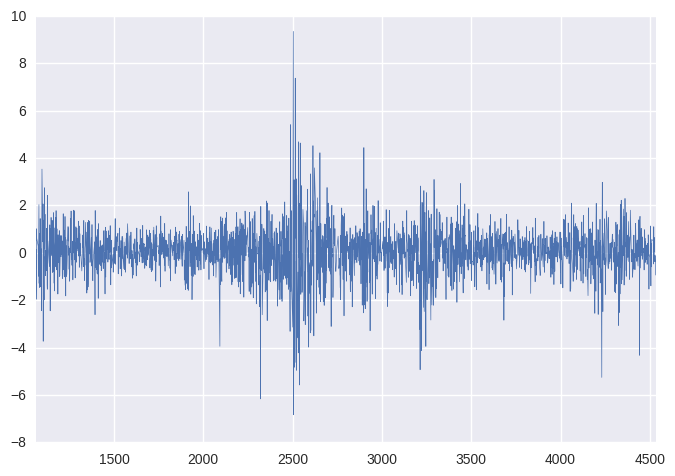

In [274]:
prices1['ptfLogRtn'].plot(linewidth=.5)

In [275]:
stats.linregress(prices1['DJIALogRtn'],prices1['ptfLogRtn'])

LinregressResult(slope=0.74650342736446595, intercept=0.0125660018867472, rvalue=0.83567204457273769, pvalue=0.0, stderr=0.0091870153971902145)

In [276]:
stats.linregress(prices1['GSPCLogRtn'],prices1['ptfLogRtn'])

LinregressResult(slope=0.69860552739744353, intercept=0.013208866887870017, rvalue=0.84349340264650419, pvalue=0.0, stderr=0.0083303391943473255)

In [277]:
stats.linregress(prices1['NDXLogRtn'],prices1['ptfLogRtn'])

LinregressResult(slope=0.55414052559195703, intercept=0.0047611682656683516, rvalue=0.78319869404382259, pvalue=0.0, stderr=0.0082376628409546251)

In [278]:
stats.linregress(prices1['GDAXILogRtn'],prices1['ptfLogRtn'])

LinregressResult(slope=0.57824955761709418, intercept=0.007450848554595331, rvalue=0.83629655333586383, pvalue=0.0, stderr=0.0070987284431291457)

In [279]:
stats.linregress(prices1['FCHILogRtn'],prices1['ptfLogRtn'])

LinregressResult(slope=0.56835284931725272, intercept=0.02163156431599017, rvalue=0.82340731119154764, pvalue=0.0, stderr=0.0073342678692677197)

In [280]:
stats.linregress(prices1['SSECLogRtn'],prices1['ptfLogRtn'])

LinregressResult(slope=0.22378714612143547, intercept=0.01745162089204904, rvalue=0.38745827501611479, pvalue=7.0200959438501208e-103, stderr=0.0099704151296996415)

In [281]:
stats.linregress(prices1['SENSEXLogRtn'],prices1['ptfLogRtn'])

LinregressResult(slope=0.37266025167599115, intercept=0.0010003313538571243, rvalue=0.5680504195650109, pvalue=1.3506813306486223e-243, stderr=0.010109925775996479)